In [2]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\akhil\Downloads\NYCTaxiFares.csv\NYCTaxiFares.csv")

In [4]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [5]:
df.shape

(120000, 8)

In [6]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [7]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [8]:
df['dist_km'] = haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [9]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [12]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [13]:
my_time = df['pickup_datetime'][0]

In [14]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours = 4)

In [15]:
df['Hour'] = df['EDTdate'].dt.hour

In [16]:
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')

In [17]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [18]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [19]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [20]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [21]:
cat_cols = ['Hour','AMorPM','Weekday']
cont_cols = ['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','passenger_count', 'dist_km']

In [22]:
y_col = ['fare_amount']

In [23]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [24]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [25]:
df['AMorPM']

0         am
1         am
2         am
3         pm
4         pm
          ..
119995    am
119996    am
119997    pm
119998    am
119999    pm
Name: AMorPM, Length: 120000, dtype: category
Categories (2, object): ['am', 'pm']

In [26]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [27]:
df['AMorPM'].cat.codes

0         0
1         0
2         0
3         1
4         1
         ..
119995    0
119996    0
119997    1
119998    0
119999    1
Length: 120000, dtype: int8

In [28]:
df['AMorPM'].cat.codes.values

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [29]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [30]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [31]:
ampm

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [32]:
wkdy

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [33]:
cats = np.stack([hr,ampm,wkdy],axis=1)

In [34]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [35]:
cats = torch.tensor(cats,dtype=torch.int64)

In [36]:
conts = np.stack([df[col].values for col in cont_cols], 1)

In [37]:
conts = torch.tensor(conts,dtype=torch.float)

In [38]:
y = torch.tensor(df[y_col].values,dtype=torch.float)

In [39]:
cats.shape

torch.Size([120000, 3])

In [40]:
conts.shape

torch.Size([120000, 6])

In [41]:
y.shape

torch.Size([120000, 1])

In [42]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [47]:
cat_szs

[24, 2, 7]

In [48]:
emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]

In [49]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [95]:
catz = cats[:2]

In [96]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [97]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])

In [98]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [99]:
embeddingz = []

for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [100]:
embeddingz

[tensor([[-1.7439, -0.0509,  1.5481,  0.9282,  0.9066, -1.4650,  0.2935,  0.7413,
           0.9301,  1.1521,  0.2850,  0.4601],
         [ 1.2692, -0.3505,  0.3052,  2.3171,  0.0191, -1.1268,  1.1583, -0.4269,
          -1.2604, -0.0367,  0.4298,  0.4232]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.7470],
         [0.7470]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.7807, -1.2000, -0.1611,  0.2314],
         [-2.1146, -0.3628, -0.7992,  0.6827]], grad_fn=<EmbeddingBackward0>)]

In [101]:
z = torch.cat(embeddingz,1)
z

tensor([[-1.7439, -0.0509,  1.5481,  0.9282,  0.9066, -1.4650,  0.2935,  0.7413,
          0.9301,  1.1521,  0.2850,  0.4601,  0.7470,  0.7807, -1.2000, -0.1611,
          0.2314],
        [ 1.2692, -0.3505,  0.3052,  2.3171,  0.0191, -1.1268,  1.1583, -0.4269,
         -1.2604, -0.0367,  0.4298,  0.4232,  0.7470, -2.1146, -0.3628, -0.7992,
          0.6827]], grad_fn=<CatBackward0>)

In [102]:
selfembdrop = nn.Dropout(0.4)

In [103]:
z = selfembdrop(z)

In [104]:
z

tensor([[-2.9065, -0.0849,  2.5801,  0.0000,  1.5111, -2.4417,  0.0000,  1.2355,
          1.5501,  0.0000,  0.4750,  0.7669,  1.2450,  1.3012, -2.0000, -0.2684,
          0.3857],
        [ 2.1153, -0.5842,  0.0000,  3.8619,  0.0000, -1.8780,  1.9304, -0.0000,
         -2.1006, -0.0612,  0.7164,  0.0000,  0.0000, -3.5243, -0.6046, -0.0000,
          0.0000]], grad_fn=<MulBackward0>)

In [115]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [ ]:
torch.cat()

In [116]:
torch.manual_seed(33)
model = TabularModel(emb_szs,conts.shape[1],1,[200,100],p=0.4)

In [117]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [118]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [119]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [120]:
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]

In [121]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [123]:
len(cat_train),len(cat_test),len(con_train),len(con_test)

(48000, 12000, 48000, 12000)

In [124]:
import time
start_time = time.time()
epochs = 300
losses = list()

for i in range(epochs):
    i+=1
    y_pred = model(cat_train,con_train)
    loss = torch.sqrt(criterion(y_pred,y_train))
    losses.append(loss.item())
    
    if i%10 == 0 or i==0:
        print(f"epoch:{i} loss is {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
duration = time.time() - start_time
print(f"Training took {duration/60} minutes")

epoch:10 loss is 11.76653003692627
epoch:20 loss is 11.163044929504395
epoch:30 loss is 10.762394905090332
epoch:40 loss is 10.480090141296387
epoch:50 loss is 10.256243705749512
epoch:60 loss is 10.05677318572998
epoch:70 loss is 9.85064697265625
epoch:80 loss is 9.655176162719727
epoch:90 loss is 9.4425048828125
epoch:100 loss is 9.207768440246582
epoch:110 loss is 8.926009178161621
epoch:120 loss is 8.614323616027832
epoch:130 loss is 8.242109298706055
epoch:140 loss is 7.851244926452637
epoch:150 loss is 7.416729927062988
epoch:160 loss is 6.964835166931152
epoch:170 loss is 6.492467403411865
epoch:180 loss is 5.9863996505737305
epoch:190 loss is 5.5336713790893555
epoch:200 loss is 5.0768208503723145
epoch:210 loss is 4.687990665435791
epoch:220 loss is 4.333983421325684
epoch:230 loss is 4.103837490081787
epoch:240 loss is 3.963160276412964
epoch:250 loss is 3.8787307739257812
epoch:260 loss is 3.8313791751861572
epoch:270 loss is 3.776092052459717
epoch:280 loss is 3.72678542137

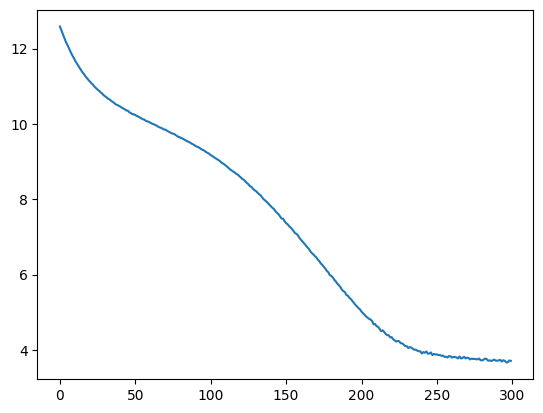

In [126]:
plt.plot(range(epochs),losses)

In [128]:
with torch.no_grad():
    y_val = model(cat_test,con_test)
    
    loss = torch.sqrt(criterion(y_val,y_test))
    print(loss.item())

3.5963196754455566


In [129]:
for i in range(10):
    print(f"{i}.) predicted {y_val[i].item():5.2f} True:{y_test[i].item():8.2f}")

0.) predicted  1.23 True:    2.90
1.) predicted 17.09 True:    5.70
2.) predicted  6.57 True:    7.70
3.) predicted 13.34 True:   12.50
4.) predicted  4.49 True:    4.10
5.) predicted  7.69 True:    5.30
6.) predicted  0.53 True:    3.70
7.) predicted 15.54 True:   14.50
8.) predicted  5.07 True:    5.70
9.) predicted  9.37 True:   10.10
